In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 创建数据集
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [3]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [4]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

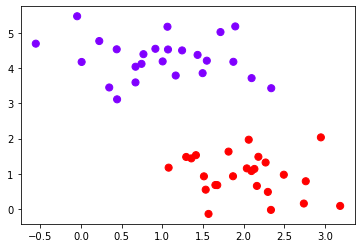

In [5]:
# 可视化数据集
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow') # 创建散点图
ax = plt.gca() # 获取当前的子图，如果不存在，则创建新的子图

In [6]:
# 画决策边界
# 获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
xlim

(-0.7425578984849813, 3.3721920271976598)

In [8]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [9]:
axisx

array([-0.7425579 , -0.60066997, -0.45878204, -0.31689411, -0.17500618,
       -0.03311826,  0.10876967,  0.2506576 ,  0.39254553,  0.53443346,
        0.67632139,  0.81820931,  0.96009724,  1.10198517,  1.2438731 ,
        1.38576103,  1.52764896,  1.66953689,  1.81142481,  1.95331274,
        2.09520067,  2.2370886 ,  2.37897653,  2.52086446,  2.66275238,
        2.80464031,  2.94652824,  3.08841617,  3.2303041 ,  3.37219203])

In [10]:
# 使用meshgrid函数将两个一维向量转换为特征矩阵
axisy,axisx = np.meshgrid(axisy,axisx) #将使用这里的二维数组作为contour函数的X和Y

In [11]:
axisx

array([[-0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ,
        -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ,
        -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ,
        -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ,
        -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ,
        -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 , -0.7425579 ],
       [-0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997,
        -0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997,
        -0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997,
        -0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997,
        -0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997,
        -0.60066997, -0.60066997, -0.60066997, -0.60066997, -0.60066997],
       [-0.45878204, -0.45878204, -0.45878204, -0.45878204, -0.45878204,
        -0.45878204, -0.45878204, -0.45878204, -0

In [12]:
axisx.shape

(30, 30)

In [13]:
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
# 其中ravel()是降维函数，vstack()能够将多个结构一致的一维数组按行堆叠
# xy是已经形成的网络，是遍布在整个画布上的密集的点

In [14]:
xy.shape

(900, 2)

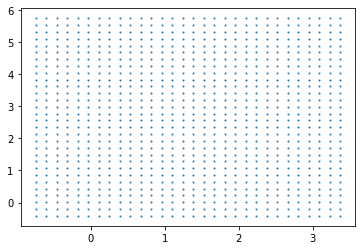

In [15]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow')

In [16]:
#理解函数meshgrid 和 vstack的作用
a = np.array([1,2,3])
b = np.array([4,5])
#两两组合，会得到多少个坐标？
v1,v2 = np.meshgrid(a,b)

In [17]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [18]:
v2

array([[4, 4, 4],
       [5, 5, 5]])

In [19]:
v1.ravel()

array([1, 2, 3, 1, 2, 3])

In [20]:
v2.ravel()

array([4, 4, 4, 5, 5, 5])

In [40]:
v = np.vstack([v1.ravel(),v2.ravel()]).T

In [41]:
v

array([[1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5]])

In [23]:
# 建模，通过fit计算对应的决策边界
clf = SVC(kernel='linear').fit(X,y)
z = clf.decision_function(xy).reshape(axisx.shape) #返回每个输入样本对应的点到决策边界的距离
                                        #将这个距离转换为axisx结构，z的结构需与X和y保持一致

In [26]:
z.shape

(30, 30)

(-0.41872382476349596, 5.754870487889891)

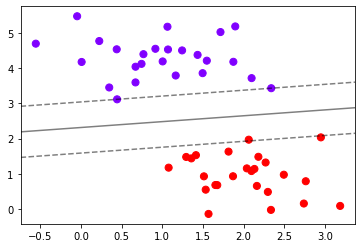

In [27]:
# 可视化数据集
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow') # 创建散点图
ax = plt.gca() # 获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,z
          ,colors='k'
          ,levels=[-1,0,1] #画三条等高线，分别是z为-1，0，1
          ,alpha=0.5 #透明度
          ,linestyles=['--','-','--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [28]:
X[10]

array([1.71444449, 5.02521524])

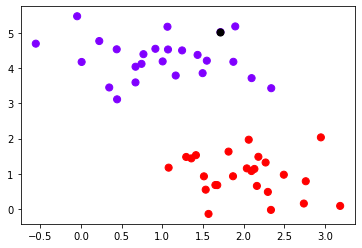

In [43]:
#查看点的位置
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.scatter(X[10,0],X[10,1],c='black',s=50,cmap='rainbow')

In [30]:
clf.decision_function(X[10].reshape(1,2))

array([-3.33917354])

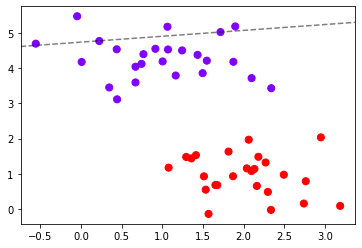

In [31]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow') # 创建散点图
ax = plt.gca() # 获取当前的子图，如果不存在，则创建新的子图

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,z
          ,colors='k'
          ,levels=[-3.33917354] #画过该点的等高线
          ,alpha=0.5 #透明度
          ,linestyles=['--'])

In [32]:
# 将上述过程包装成函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

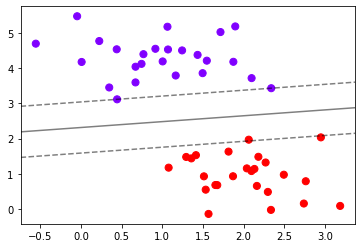

In [33]:
# 整个绘图过程可以写作
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [34]:
#模型评估
clf.predict(X) #根据决策边界，对样本进行分类

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [35]:
clf.score(X,y) #平均准确度

1.0

In [36]:
clf.support_vectors_ #返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [37]:
clf.n_support_ #返回每个类中支持向量的个数

array([2, 1])